## Importing the necessary libraries

In [68]:
import numpy as np  # Importing the NumPy library for numerical computations
import pandas as pd  # Importing the pandas library for data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature standardization
from sklearn.model_selection import train_test_split  # Importing train_test_split for dataset splitting
from sklearn import svm  # Importing the support vector machine algorithm
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score  # Importing metric scores for model evaluation

## Data Retrieval and Analysis

In [69]:
data = pd.read_csv("diabetes.csv")  # Reading the diabetes data from the "diabetes.csv" file and storing it in the 'data' variable
data.head()  # Displaying the first few rows of the loaded data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
data.shape #Gives the number of rows and columns of the dataframe

(768, 9)

In [71]:
data.describe() #Gives a statistical description of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
data['Outcome'].value_counts() #Counts the frequency of each unique value in the Outcome column of the dataset

0    500
1    268
Name: Outcome, dtype: int64

Note: '0' stands for non-diabetic and '1' stands for diabetic

In [73]:
data.groupby('Outcome').mean()#Gives an insight into the average values of the numeric features in the dataset based on different outcomes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [74]:
null_values = data.isnull().sum()#Gives the total number of null values in the dataset
null_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset

In [75]:
# Calculate the correlation matrix
correlation_matrix = data.corr()  # Calculate the correlation matrix for the DataFrame 'data'
print("Correlation matrix:")
print(correlation_matrix)  # Print the correlation matrix

Correlation matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

 This computes the correlation coefficient for each pair of columns, ranging from -1 to 1, indicating the strength and direction of the linear relationship between the variables.

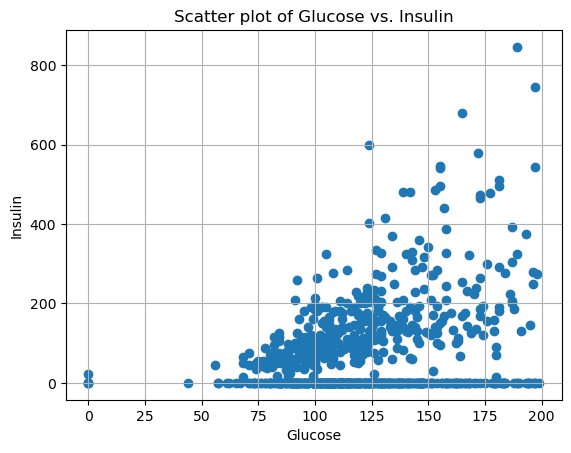

In [76]:
# Plot a scatter plot of Glucose vs. Insulin
plt.scatter(data['Glucose'], data['Insulin'])  # Create a scatter plot with 'Glucose' on the x-axis and 'Insulin' on the y-axis
plt.grid()  # Add grid lines to the plot
plt.xlabel('Glucose')  # Set the x-axis label as 'Glucose'
plt.ylabel('Insulin')  # Set the y-axis label as 'Insulin'
plt.title('Scatter plot of Glucose vs. Insulin')  # Set the title of the plot
plt.show()  # Display the scatter plot

This generates a scatter plot showing the relationship between 'Glucose' and 'Insulin' for each data point.

In [77]:
X = data.drop(columns='Outcome', axis=1)  # Create X by dropping the 'Outcome' column from 'data'
Y = data['Outcome']  # Assign the 'Outcome' column as the target variable Y

## Data Standardization

In [78]:
scaler = StandardScaler()  # Create an instance of the StandardScaler class
scaler.fit(X)  # Fit the scaler to the data in X, calculating the mean and standard deviation for each feature
standardized_data = scaler.transform(X)  # Standardize the features in X using the fitted scaler
X = standardized_data  # Assign the standardized features to the variable X

The StandardScaler is a preprocessing technique that standardizes features by subtracting the mean and scaling to unit variance. It is commonly used to normalize the input data before training a machine learning model.

## Splitting into Train and Test Data

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

The train_test_split function is used to split the data into training and testing sets. It takes the input features 'X' and the target variable 'Y' as its first two arguments.

The 'test_size' parameter is set to 0.2, which means that 20% of the data will be allocated for testing, while the remaining 80% will be used for training.

The 'stratify' parameter is set to 'Y', which ensures that the class distribution in the original data is preserved in the training and testing sets. This is important when dealing with imbalanced datasets, where the target variable has unequal proportions of different classes.

The 'random_state' parameter is set to 2, which ensures reproducibility of the random sampling. Using the same random state value will yield the same split of data each time the code is executed.

The function returns four sets of data: 'X_train' (training set input features), 'X_test' (testing set input features), 'Y_train' (training set target variable), and 'Y_test' (testing set target variable). These sets can be used for training and evaluating machine learning models, ensuring that the data is split consistently between different runs.

In [80]:
print(X.shape, X_train.shape, X_test.shape)# Getting a picture of the split data by looking at the munber of rows and columns

(768, 8) (614, 8) (154, 8)


## Training the Model

In [81]:
classifier = svm.SVC(kernel='linear')  # Create an SVM classifier with a linear kernel
classifier.fit(X_train, Y_train)  # Fit the classifier to the training data

SVC(kernel='linear')

This trains the SVM model on the provided training data, allowing it to learn the patterns and relationships between the features and the corresponding class labels.

After executing this code, the SVM classifier is trained and ready to make predictions on new, unseen data.

## Model Evaluation

In [82]:
# Accuracy score on train data
X_train_prediction = classifier.predict(X_train)  # Predict the labels for the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)  # Calculate the accuracy of the predictions
training_data_accuracy  # Print the accuracy of the predictions

0.7866449511400652

In [83]:
# Accuracy score on test data
X_test_prediction = classifier.predict(X_test) # Predict the labels for the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) # Calculate the accuracy of the predictions
test_data_accuracy  # Print the accuracy of the predictions

0.7727272727272727

In [84]:
# Precision Score on train data
training_data_precision = precision_score(X_train_prediction, Y_train)
training_data_precision

0.5887850467289719

It calculates the precision score, which measures the proportion of true positive predictions out of all positive predictions made by the model.

In [85]:
# Precision Score on test data
test_data_precision = precision_score(X_test_prediction, Y_test)
test_data_precision

0.5185185185185185

In [86]:
# f1 score on train data
training_data_f1 = f1_score(X_train_prediction, Y_train)
training_data_f1

0.6579634464751958

 The F1 score provides a balanced measure of model performance, considering both false positives and false negatives.

In [87]:
# f1 score on test data
test_data_f1 = f1_score(X_test_prediction, Y_test)
test_data_f1

0.6153846153846154

In [88]:
# recall score on train data
training_data_recall = recall_score(X_train_prediction, Y_train)
training_data_recall

0.7455621301775148

It calculates the recall score, which measures the proportion of true positive predictions out of all actual positive instances.

In [89]:
# recall score on test data
test_data_recall = recall_score(X_test_prediction, Y_test)
test_data_recall

0.7567567567567568

## Making a Diabetes Prediction System

In [90]:
# Creating a function that predicts if a patient is diabetic or non-diabetic
def predictor(input_data):
    input_data_as_numpy_array = np.asarray(input_data)  # Convert the input data to a numpy array
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)  # Reshape the array to have a single row
    std_data = scaler.transform(input_data_reshaped)  # Standardize the input data using the pre-trained scaler
    prediction = classifier.predict(std_data)  # Predict the label using the trained classifier
    if (prediction[0] == 0):  # Check if the predicted label is 0 (non-diabetic)
        print("The person is non-diabetic")  # Print the prediction as non-diabetic
    else:
        print("The person is diabetic")  # Print the prediction as diabetic


This function allows you to make predictions on new input data by passing it to the predictor function, which utilizes the trained classifier and scaler to provide a diabetes prediction based on the input data.

In [91]:
input_data = (6,148,72,35,0,33.6,0.627,50) #Sample input data
predictor(input_data)

The person is diabetic


/Users/francischukwudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
